In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
from shapely.geometry import Polygon
from dbfread import DBF
from jenkspy import jenks_breaks
import matplotlib.pyplot as plt
from collections import Counter


In [38]:
#importar datos
datos_ruta = r"C:\Users\UTIC\Documents\Alejandro\Docs\GIS\MiBici\Unidades_economicas.gpkg"

UE_gdf = gpd.read_file(datos_ruta, layer='UE_300m')
Est_gdf = gpd.read_file(datos_ruta, layer='Estaciones_300m')

In [21]:
Est_gdf = Est_gdf.drop(columns=['Name', 'OBJECTID', 'POLIG', 'ETAPA', 
        'Cruce_C', 'Acera',
       'Exten_m', 'Ubicacion', 'Placas', 'ESTADO', 'Zona_limpi', 'NOM', 'x',
       'y', 'Cluster', 'VIAJES', 'layer', 'path', 'fid_2', 'NOMBRE', 'SupKM2'])

UE_gdf= UE_gdf.drop(columns=[ 'tipo_v_e_1', 'nom_v_e_1',
       'tipo_v_e_2', 'nom_v_e_2', 'tipo_v_e_3', 'nom_v_e_3', 'numero_ext',
       'letra_ext', 'edificio', 'edificio_e', 'numero_int', 'letra_int', 'tipoCenCom', 'nom_CenCom', 'num_local','entidad', 'cve_loc',
       'localidad', 'ageb', 'manzana', 'telefono', 'correoelec', 'www'])

In [42]:
UE_gdf

,id,clee,nom_estab,raz_social,codigo_act,nombre_act,per_ocu,tipo_vial,nom_vial,tipo_asent,...,cod_postal,cve_ent,cve_mun,municipio,tipoUniEco,latitud,longitud,fecha_alta,empleados,geometry
0,1636785,14120326140000011011000000U8,DISEÑOS ANITA,None,315229,Confección en serie de otra ropa exterior de m...,11 a 30 personas,ANDADOR,ANDADOR PLATA,COLONIA,...,45149,14,120,Zapopan,Fijo,20.734564,-103.400937,2010-07,20,POINT (-103.40094 20.73456)
1,8990459,14120311999000194000000000U8,NB FOODS,NB FOODS S DE RL DE CV,311999,Elaboración de otros alimentos,31 a 50 personas,BOULEVARD,LA CARRETA,PARQUE INDUSTRIAL,...,45150,14,120,Zapopan,Fijo,20.735683,-103.399162,2019-11,40,POINT (-103.39916 20.73568)
2,1705969,14120339111000124010000000U5,OBIT,OBIT SA DE CV,315999,Confección de otros accesorios y prendas de ve...,31 a 50 personas,CALLE,FERNANDO ARANGUREN,PARQUE INDUSTRIAL,...,45130,14,120,Zapopan,Fijo,20.737034,-103.401050,2014-12,40,POINT (-103.40105 20.73703)
3,9408844,14120311811000107000002859S7,1046_PLANTA JULITAS,BIMBO SA DE CV,311811,Panificación industrial,251 y más personas,CALLE,EUGENIO CUZIN,COLONIA,...,45130,14,120,Zapopan,Fijo,20.737002,-103.399711,2023-11,251,POINT (-103.39971 20.73700)
4,1636689,14120311830002331000000000U7,TORTILLERIA LA CHINA,None,311830,Elaboración de tortillas de maíz y molienda de...,0 a 5 personas,CALLE,LAZARO CARDENAS,COLONIA,...,45147,14,120,Zapopan,Fijo,20.732244,-103.397427,2010-07,3,POINT (-103.39743 20.73224)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43805,1885766,14039812110007421000000000U8,JAVIER SALON,None,812110,Salones y clínicas de belleza y peluquerías,0 a 5 personas,CALZADA,CALZADA DEL FEDERALISMO NORTE,COLONIA,...,44218,14,039,Guadalajara,Fijo,20.705967,-103.354915,2010-07,3,POINT (-103.35492 20.70597)
43806,1886001,14039811410002661000000000U9,REPARACION DE ELECTRODOMESTICOS CENTRAL DOMESTICA,None,811410,Reparación y mantenimiento de aparatos eléctri...,0 a 5 personas,CALZADA,CALZADA DEL FEDERALISMO NORTE,COLONIA,...,44220,14,039,Guadalajara,Fijo,20.706179,-103.354523,2010-07,3,POINT (-103.35452 20.70618)
43807,8663441,14039812110058751000000000U6,NAILS MUÑOS,None,812110,Salones y clínicas de belleza y peluquerías,0 a 5 personas,CALLE,6 DE DICIEMBRE,COLONIA,...,44280,14,039,Guadalajara,Fijo,20.706177,-103.355880,2019-11,3,POINT (-103.35588 20.70618)
43808,1885994,14039811112003041000000000U5,SERVICIO ELECTRICO MECANICO SANDOVAL,None,811111,Reparación mecánica en general de automóviles ...,0 a 5 personas,CALLE,DIEGO ARANDA Y CARPINTEIRO,COLONIA,...,44220,14,039,Guadalajara,Fijo,20.706174,-103.354425,2010-07,3,POINT (-103.35442 20.70617)


In [40]:
#Crear ponderación por actividades
a = dict(Counter(UE_gdf['nombre_act']))
Actividades = pd.DataFrame(list(a.items()), columns=['Actividad', 'Valor'])
Actividades.rename(columns={'Actividad': 'nombre_act'}, inplace=True)
b = UE_gdf.dissolve(by='nombre_act', aggfunc='sum')
Actividades = Actividades.merge(b[['empleados']], on='nombre_act', how='left')
Actividades = Actividades.sort_values(by=['empleados'], ascending=False)

In [66]:
Actividades.to_csv(r"C:\Users\UTIC\Documents\Alejandro\Docs\GIS\MiBici\Actividades_económicas.csv")

<Axes: xlabel='nombre_act'>

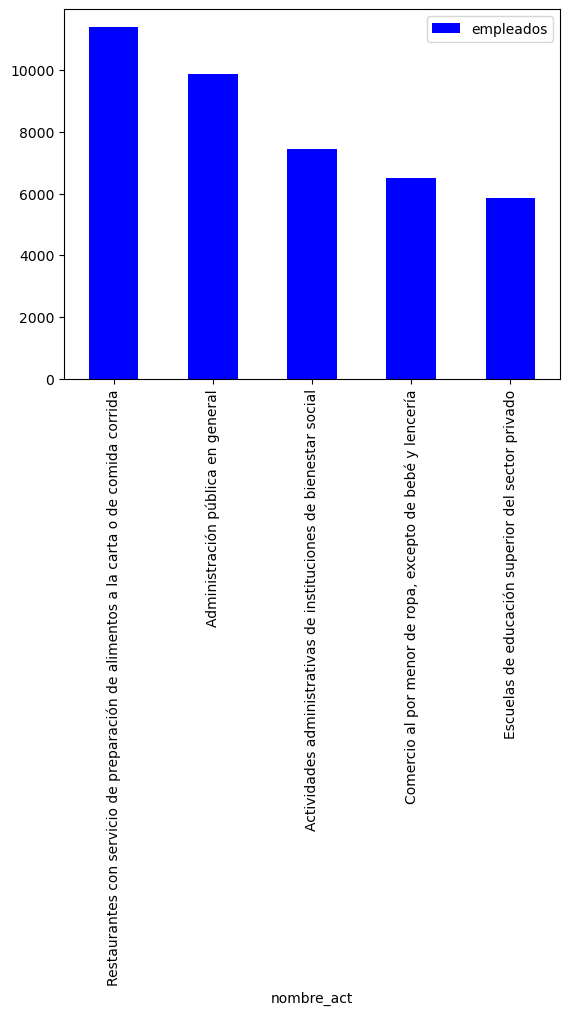

In [63]:
Actividades.head().plot(kind='bar', x='nombre_act', y=['empleados'], color=['blue','red'])

In [36]:
Est_gdf

,CLAVE,Num_UE,empleados,geometry
0,ZPN-024,138.0,1439.0,"MULTIPOLYGON (((667037.571 2293581.601, 667022..."
1,ZPN-023,108.0,1288.0,"MULTIPOLYGON (((668192.272 2293355.811, 668177..."
2,ZPN-052,244.0,1324.0,"MULTIPOLYGON (((667636.448 2293371.981, 667621..."
3,ZPN-048,214.0,2305.0,"MULTIPOLYGON (((668102.512 2293071.269, 668087..."
4,ZPN-055,46.0,622.0,"MULTIPOLYGON (((668448.598 2293272.122, 668433..."
...,...,...,...,...
355,ZPN-073,65.0,998.0,"MULTIPOLYGON (((664966.451 2285893.414, 664951..."
356,ZPN-074,80.0,1024.0,"MULTIPOLYGON (((664569.057 2285824.915, 664554..."
357,ZPN-075,97.0,1162.0,"MULTIPOLYGON (((664393.525 2285578.923, 664378..."
358,ZPN-076,64.0,1135.0,"MULTIPOLYGON (((664857.044 2285603.073, 664842..."


In [2]:
#importar datos
datos_ruta = r"C:\Users\UTIC\Desktop\CV_2024\CV_2024.shp"

CV_gdf = gpd.read_file(datos_ruta)

In [4]:
CV_gdf.columns

Index(['fid', 'NOM_CV', 'DIST_KM', 'MUN', 'CALLE_1', 'CALLE_2', 'TIPO_CV',
       'ANO_CONST', 'ANO_RCONST', 'GOB', 'DIR_CV', 'CICLV', 'SENTIDO', 'TRAMO',
       'CV_CV', 'CORR', 'geometry'],
      dtype='object')

In [5]:
CV_gdf = CV_gdf[['fid', 'CV_CV', 'CORR','MUN', 'CICLV',  'TRAMO','SENTIDO', 'NOM_CV', 'DIST_KM', 'CALLE_1', 'CALLE_2', 'TIPO_CV',
       'ANO_CONST', 'ANO_RCONST', 'GOB', 'DIR_CV', 
       'geometry']]

In [7]:
# Guardar el resultado final
CV_gdf.to_file(datos_ruta)